# Task 3

# Table of Contents
- [Task 3A.1](#Task 3a.1)
- [Task 3A.2](#Task 3a.2)
- [Task 3A.3](#Task 3a.3)

- [Task 3B.1](#Task 3b.1)
- [Task 3B.2](#Task 3b.2)
- [Task 3B.3](#Task 3b.3)
- [Task 3B.4](#Task 3b.4)



In [12]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import random as r
from scipy import ndimage
from scipy.misc import toimage

%matplotlib inline

In [16]:
#Read images
i1=imread("HW1/Images/Q1/cameraman.jpg")

#Convert to grayscale by using average of RGB
def average(pixel):
    return (int(pixel[0])+int(pixel[1])+int(pixel[2]))/3

def rgb2gray(image):
    gray = np.zeros((image.shape[0], image.shape[1])) # init 2D numpy array
    for rownum in range(len(image)):
        for colnum in range(len(image[rownum])):
            gray[rownum][colnum] = average(image[rownum][colnum])

    return gray
im_church_gray = rgb2gray(i1)
#im_church_gray = rgb2gray(im_church)
#im_golf_gray = rgb2gray(im_golf)
#im_nuns_gray = rgb2gray(im_nuns)

In [21]:
from skimage.io import imread
im_church = imread("HW1/Images/Q3/Church.jpg")
im_golf = imread("HW1/Images/Q3/Golf.jpg")
im_nuns = imread("HW1/Images/Q3/Nuns.jpg")

# Task 3A.1
<a id='Task 3a.1'></a>

In [49]:
from skimage import feature
from skimage import filters

def apply_sobel(image,pixel_value):
    edges = filters.sobel(image)
    edges = global_threshold(edges,pixel_value)
    
    return edges

def global_threshold(image,pixel_value):
    
    for rownum in range(len(image)):
        for colnum in range(len(image[rownum])):
            if image[rownum][colnum] > pixel_value:
                image[rownum][colnum] = 255
            else:
                image[rownum][colnum] = 0
                

    return image


def apply_gaussian_laplace(image,sigma,threshold): 
    
    # Skiimage.ndimage.filters
    edges = ndimage.filters.gaussian_laplace(image,sigma)
    
    # zero crossing + local thresholding
    edges_after = zero_crossing_local_thresholding(edges,threshold)
    
    return edges_after

def zero_crossing_local_thresholding(edges,threshold): 
    sol_image = np.zeros((edges.shape[0], edges.shape[1])) # init 2D numpy array
    
    #1. They should be done in a 3x3 block for every 3x3 block (apart from the borders of the image)
    for rownum in range(len(edges)-2):
        for colnum in range(len(edges[rownum])-2):
            temp_3by3 = np.matrix([
                                  [edges[rownum][colnum],edges[rownum][colnum+1],edges[rownum][colnum+2]],
                                  [edges[rownum+1][colnum],edges[rownum+1][colnum+1],edges[rownum+1][colnum+2]],
                                  [edges[rownum+2][colnum],edges[rownum+2][colnum+1],edges[rownum+2][colnum+2]]])
            
            #2. Zero is crossed when the minimum and the maximum of the block have different signs.
            #3. If they have the same sign, or one of them is zero, zero was not crossed.
            #4. A pixel passes the threshold if the difference between the maximum and
            #   the minimum (MAX - MIN) in its 3x3 block is bigger than the threshold value.
    
            is_zero_crossed = is_crossed(temp_3by3,threshold)
            
            sol_image[rownum+1][colnum+1] = is_zero_crossed
            
    return sol_image

def is_crossed(matrix,threshold):
    min_val = np.min(matrix)
    

    max_val = np.max(matrix)
    if (max_val-min_val > threshold) and ((min_val > 0 and max_val > 0) or (min_val <0 and max_val<0)):
        return 0 #zero is not crossed
    else:
        return 1 #zero is crossed



def apply_canny(image,sigma):
    
    # Compute the Canny filter for a value of sigma
    edges = feature.canny(image, sigma)
    return edges

def show_canny_only(edges):
    
    # display results
    fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(8, 3),
                                        sharex=True, sharey=True)

    ax2.imshow(edges1, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Canny filter, $\sigma=5$', fontsize=20)

    fig.tight_layout()

    plt.show()
    pass
    
    

    

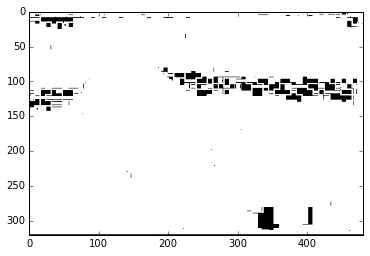

In [32]:
apply_sobel(im_church,0)
#apply_sobel(im_golf,0)
#apply_sobel(im_nuns,0)

plt.imshow(apply_sobel(im_church,0),cmap=plt.cm.gray)
#apply_sobel(im_golf,10)
#apply_sobel(im_nuns,10)

#apply_sobel(im_church,20)
#apply_sobel(im_golf,20)
#apply_sobel(im_nuns,20)


#a = plt.imshow(apply_gaussian_laplace(im_cameraman_gray,10,5),cmap=plt.cm.gray)


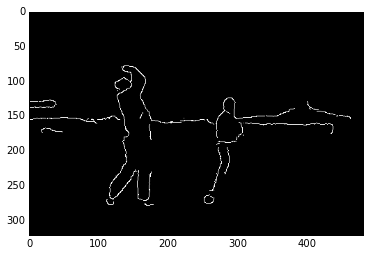

In [44]:
#Manually edit canny sigma value
image = im_golf
sigma_value = 3.75
plt.imshow(apply_canny(image,sigma_value),cmap=plt.cm.gray)


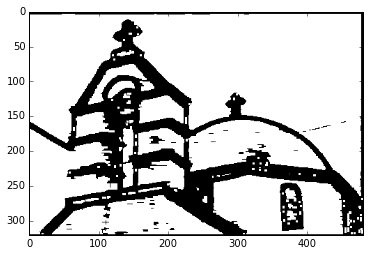

In [52]:
#Manually edit Gaussian-Laplace
image=im_church
threshold = 0
sigma_value = 2.75
plt.imshow(apply_gaussian_laplace(image,sigma_value,threshold),cmap=plt.cm.gray)


# Task 3A.2

<a id='Task 3a.2'></a>

# Task 3A.3

<a id='Task 3a.3'></a>

# Task 3B.1

<a id='Task 3b.1'></a>

# Task 3B.2

<a id='Task 3b.2'></a>

# Task 3B.3

<a id='Task 3b.3'></a>

# Task 3B.4

<a id='Task 3b.4'></a>